# K-means Clustering Algorithm

##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-fundations)
3. [Learning Algorithm](#learning-algorithm)
    - [Define a K-means class](#define-a-k-means-class)
    - [Showcase the above classifier in the blobs dataset](#showcase-the-above-classifier-in-the-blobs-dataset)
4. [Difference between K-means and DBSCAN](#difference-between-k-means-and-dbscan)
    - [Comparison of K-means and DBSCAN on different datasets](#comparison-of-k-means-and-dbscan-on-different-datasets)
5. [Pros and Cons](#pros-and-cons)
6. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
7. [References](#references)

## Introduction
K-means is a widely-used, partitioning-based clustering algorithm, primarily designed to group data points in a dataset into a pre-defined number of non-overlapping subgroups or clusters. Introduced by Stuart Lloyd in 1957 and later published by Edward W. Forgy in 1965, the algorithm operates based on the principle of minimizing the within-cluster sum of squares. This implies that it tries to make the intra-cluster data points as similar as possible while also keeping the clusters distinct from each other.

The fundamental objective of the K-means algorithm is to partition data points into distinct clusters where each data point belongs to the cluster with the closest mean value. Given its efficiency and simplicity, K-means has been utilized in a wide variety of applications including market segmentation, computer vision, geospatial analysis, anomaly detection, and many more. Despite its widespread use, it's worth noting that K-means is highly sensitive to initial centroid selection and can sometimes converge to a local optimum. However, techniques such as [k-means++](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca) have been proposed to deal with some of these challenges.


## Mathematical Foundations

The mathematical foundations of the K-means algorithm revolve around the concept of cluster assignment and centroid update, aiming to minimize the sum of the squared Euclidean distances between each point and the center of its assigned cluster.

The objective function for K-means, often called the inertia or within-cluster sum-of-squares (WCSS) criterion, can be written as follows:

$$
J = \sum_{i=1}^k \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $J$ is the objective function,
- $k$ is the number of clusters,
- $C_i$ is the set of points that belong to cluster $i$,
- $x$ is a point in $C_i$,
- $\mu_i$ is the centroid (mean) of points in $C_i$, and
- $\| x - \mu_i \|^2$ is the squared Euclidean distance from a point to the centroid of its assigned cluster.

The K-means algorithm iteratively performs two steps until convergence:
1. **Assignment Step**: Each data point is assigned to its nearest centroid, where 'nearest' is defined using the Euclidean distance. Mathematically, this can be expressed as:

$$
C_i = \{ x : \| x - \mu_i \|^2 \leq \| x - \mu_j \|^2 \; \forall j, 1 \leq j \leq k \}
$$

2. **Update Step**: The centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster:

$$
\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
$$

This process is repeated until the centroids do not change significantly or a maximum number of iterations is reached. The algorithm converges to a result where the within-cluster sum of squares cannot be decreased further by changing the class memberships or centroids.


## Learning Algorithm

The learning algorithm for k-means consists of the following steps:

1. Initialize the centroids randomly by selecting k data points from the dataset. The number of clusters (k) is a hyperparameter of the k-means algorithm.
2. Assign each data point to the nearest centroid.
3. Update the centroids by calculating the mean of all the data points assigned to each centroid.
4. Repeat steps 2 and 3 until the centroids' positions do not change significantly or a maximum number of iterations is reached.

### Define a K-means class



In [138]:
import numpy as np

# Define the KMeans class
class KMeans:
    """
    K-Means clustering algorithm.

    Parameters
    ----------
    n_clusters : int, optional (default=3)
        The number of clusters to form as well as the number of centroids to generate.

    max_iter : int, optional (default=300)
        Maximum number of iterations of the k-means algorithm for a single run.

    random_state : int, RandomState instance or None, optional (default=None)
        Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
    
    Attributes
    ----------
    cluster_centers_ (array-like): Coordinates of cluster centers.
    centroids_all_iterations : list
        List containing the centroids at each iteration of the k-means algorithm.
    """
    # Initialize the class with parameters: number of clusters, maximum iterations, and random state for reproducibility
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids_all_iterations = []  # to store centroids at each iteration

    # Define a private method to calculate the Euclidean distance between two points
    def _euclidean_distance(self, a, b):
        """
        Calculate the Euclidean distance between two points a and b.

        Parameters:
        a (array-like): First point.
        b (array-like): Second point.

        Returns:
        float: Euclidean distance between points a and b.
        """
        return np.sqrt(np.sum((a - b) ** 2))

    # Define the fit_predict method to fit the model to the data and predict the cluster each data point belongs to
    def fit_predict(self, X):
        """
        Compute k-means clustering.

        Parameters:
        X (array-like): Training instances to cluster.

        Returns:
        array-like: Predicted cluster index for each sample.
        """
        # Set the random seed for reproducibility
        np.random.seed(self.random_state)
        # Randomly initialize the centroids using data points
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        # Store the initial centroids
        self.centroids_all_iterations.append(centroids)

        # Repeat the process for a specified number of iterations
        for _ in range(self.max_iter):
            # Assign each data point to the closest centroid
            clusters = [np.argmin([self._euclidean_distance(x, centroid) for centroid in centroids]) for x in X]
            # Calculate new centroids by taking the mean of all data points assigned to each centroid
            new_centroids = [X[np.array(clusters) == i].mean(axis=0) for i in range(self.n_clusters)]

            # If the centroids do not change significantly (convergence), break the loop
            if np.allclose(centroids, new_centroids):
                break
            # Update centroids
            centroids = new_centroids
            # save centroids at this iteration
            self.centroids_all_iterations.append(np.array(centroids))  
        # Store the final centroids
        self.cluster_centers_ = np.array(centroids)
        # Return the cluster assignments
        return np.array(clusters)


### Showcase the above classifier in the blobs dataset

The [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function is a utility function in the `sklearn.datasets` module that generates random datasets with blobs/clustered structures. It can be useful for testing clustering algorithms or creating simple datasets for classification.

This function allows you to specify the number of samples, number of features, number of centers (clusters), standard deviation of the clusters, and random seed. It returns the dataset as well as the cluster labels for each data point. Here we use this function to generate a dataset with 300 samples, 2 features, 3 clusters, and a standard deviation of 1.0.


In [139]:
# Import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

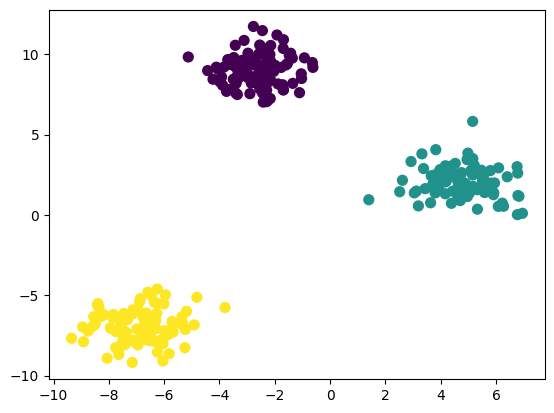

In [140]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2,
                       cluster_std=1.0, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50)
plt.show()

We choose k=3 and implement the K-means algorithm on the above dataset and visualize the results. The following figure shows the final clusters and the centroids (marked as cross).

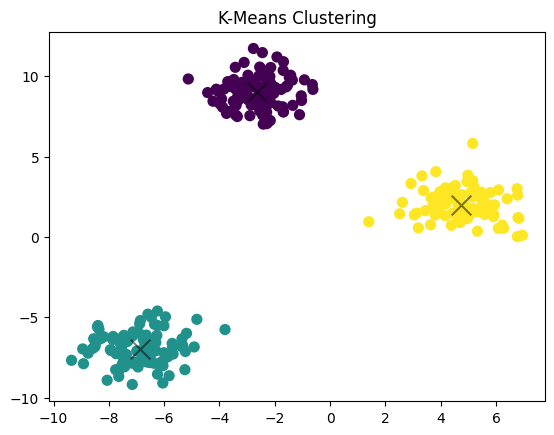

In [141]:
# Instantiate the class
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit and predict
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x')

plt.title('K-Means Clustering')
plt.show()


We also plot the data points and the centroids at each iteration to visualize the algorithm's progress.

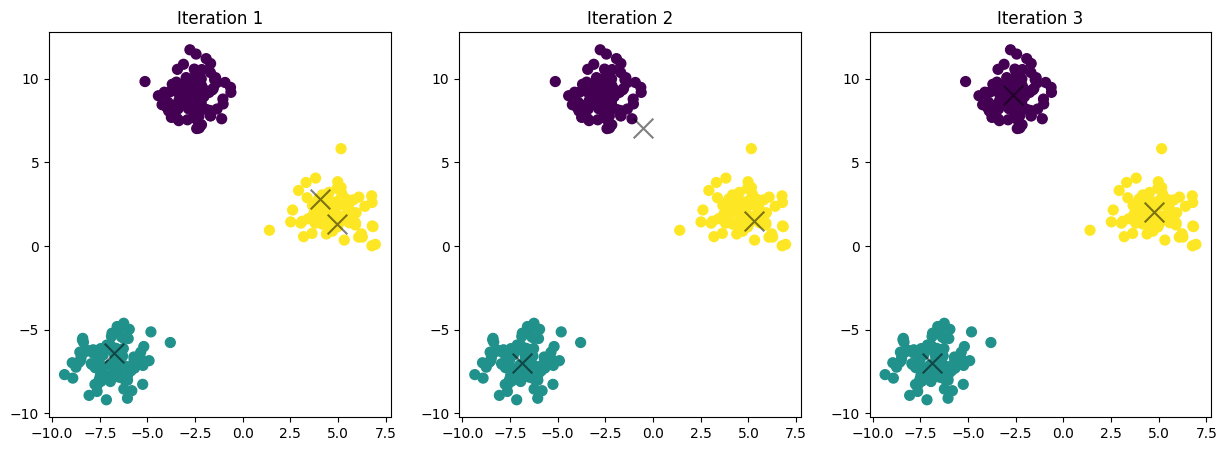

In [142]:
# Visualize the centroids at each iteration
fig, axs = plt.subplots(1, len(kmeans.centroids_all_iterations),  figsize=( 5*len(kmeans.centroids_all_iterations), 5))

for i, centroids in enumerate(kmeans.centroids_all_iterations):
    axs[i].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    axs[i].scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5, marker='x')
    axs[i].set_title('Iteration {}'.format(i + 1))

plt.show()


k is an important hyperparameter that needs to be tuned. We next show the effect of changing the value of k on the clusters.

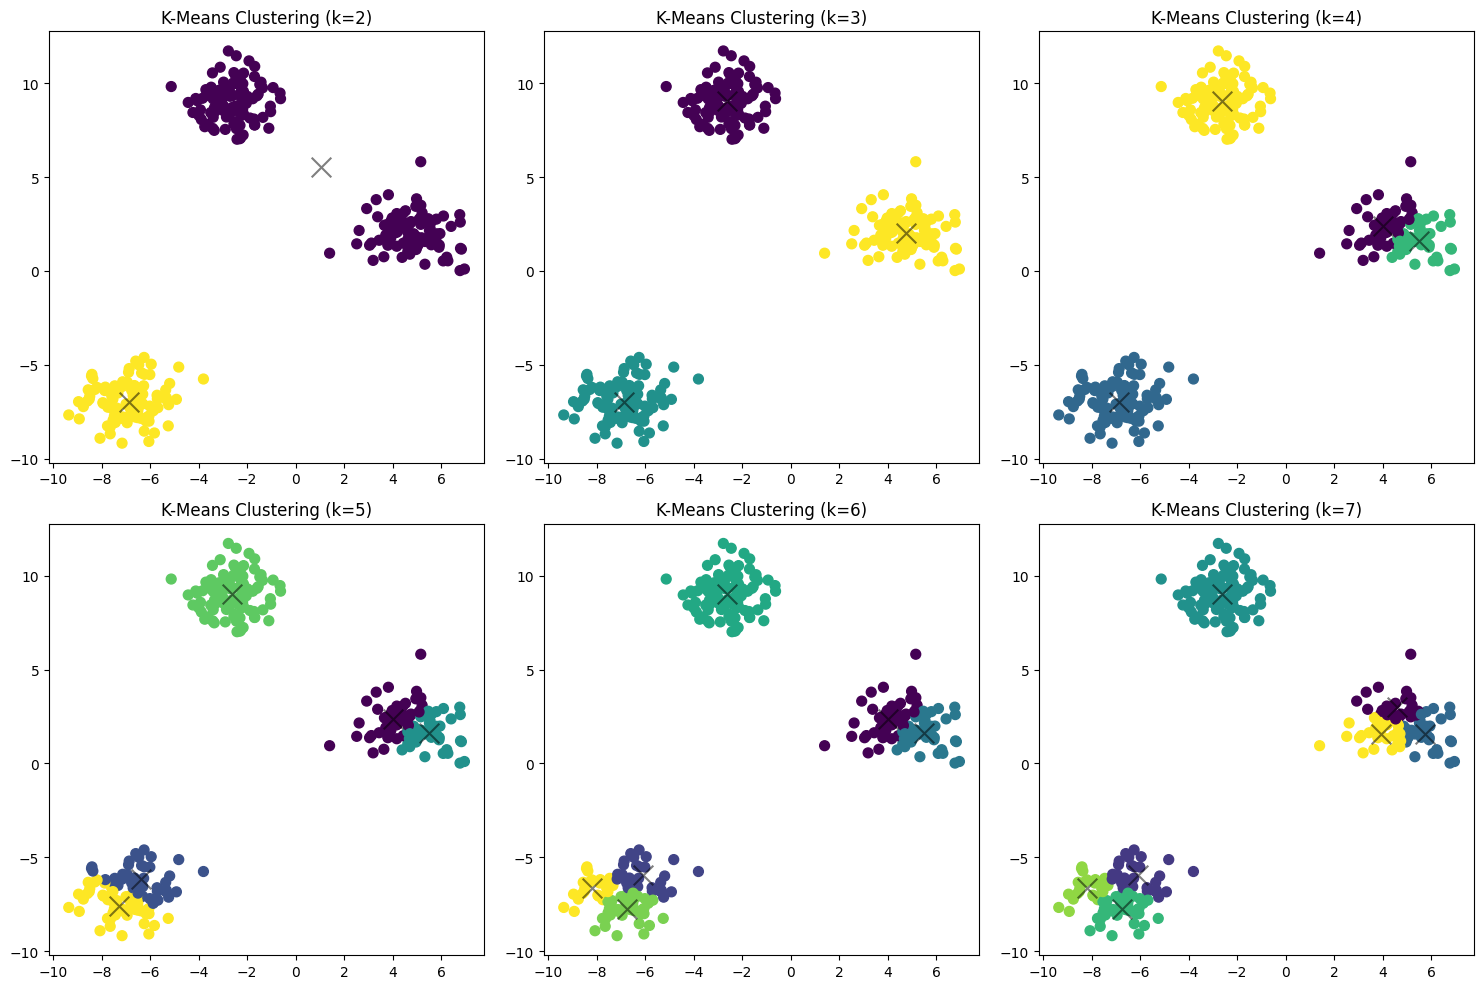

In [143]:
# Compare different values of k
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k_values = [2, 3, 4, 5, 6, 7]

for i, ax in enumerate(axes.flat):
    k = k_values[i] # current value of k
    kmeans = KMeans(n_clusters=k, random_state=42) # instantiate the class
    y_kmeans = kmeans.fit_predict(X) # fit and predict

    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') # visualize the clusters

    # plot the centroids
    centers = kmeans.cluster_centers_ 
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x')
    
    ax.set_title(f'K-Means Clustering (k={k})')

plt.tight_layout()
plt.show()

## Difference between K-means and DBSCAN

The main differences between k-means and [DBSCAN](./DBSCN.ipynb) are:

- K-means requires the number of clusters as an input parameter, while DBSCAN does not.
- K-means is sensitive to the initial placement of centroids and may converge to local optima, while DBSCAN is more robust due to its density-based approach.
- K-means tends to work well with spherical clusters and may struggle with clusters of arbitrary shapes, while DBSCAN can find clusters of any shape.
- K-means is less robust to noise compared to DBSCAN, which can identify and separate noise points from clusters.
- DBSCAN can handle datasets with varying densities, while k-means assumes similar densities across clusters.

Here's a table to summarize the difference between DBSCAN and k-means clustering algorithms:

| Criterion            | DBSCAN                                          | k-means                                          |
|----------------------|-------------------------------------------------|--------------------------------------------------|
| Algorithm type       | Density-based clustering                        | Partition-based clustering                       |
| Cluster shapes       | Can handle clusters of arbitrary shapes         | Assumes spherical clusters                        |
| Number of clusters   | Automatically determined by the algorithm       | Must be specified in advance (hyperparameter)    |
| Noise handling       | Identifies and separates noise points           | No explicit noise handling; noise affects clusters|
| Cluster assignment   | Points can remain unassigned (noise)            | All points are assigned to a cluster             |
| Sensitivity to initialization | Not sensitive to initialization       | Sensitive to initial centroids selection         |
| Complexity           | $O(n \log n)$ with suitable index structure     | Typically $O(n \cdot k \cdot I \cdot t)$, where $n$: points, $k$: clusters, $I$: iterations, $t$: dimensions |

### Comparison of K-means and DBSCAN on different datasets

We will now compare the performance of k-means and DBSCAN on dataests with different distributions. Here we will use the blobs, no structure, anisotropic, and varied blobs datasets from scikit-learn, which are suitable for k-means clustering (except for the no structure dataset). Please refer to the [DBSCN](./DBSCN.ipynb) notebook for a discussion on the types of data distributions that are more suited for DBSCAN compared to k-means.

In [144]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [145]:
# Import libraries
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

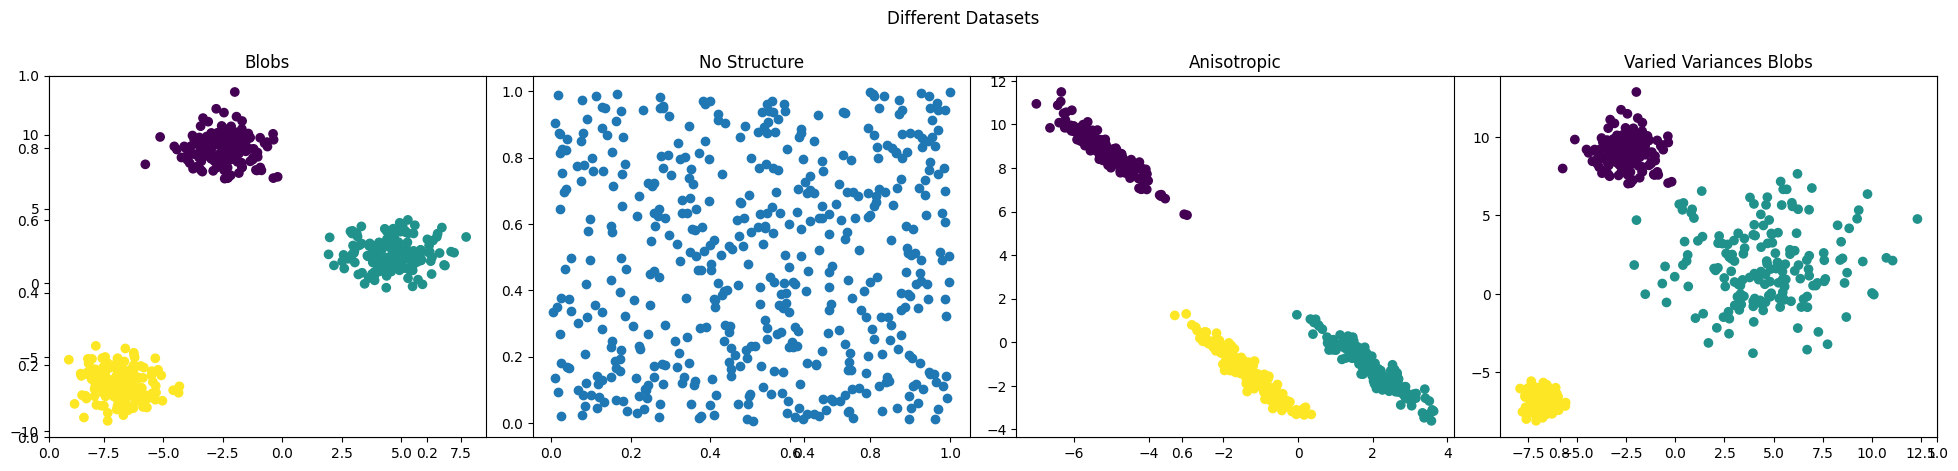

In [146]:
# Generate different datasets. 
n_samples = 500
random_state = 42

# blobs
blobs = make_blobs(n_samples=n_samples, random_state=random_state)

# No structure
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Visualize the datasets

# Set figure size and title
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Different Datasets')

# Plot each dataset in a subplot
datasets = [
    ('Blobs', blobs),
    ('No Structure', no_structure),
    ('Anisotropic', aniso),
    ('Varied Variances Blobs', varied)
]

for i, (title, data) in enumerate(datasets, 1):
    X, y = data
    ax = fig.add_subplot(1, 4, i)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_title(title)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()



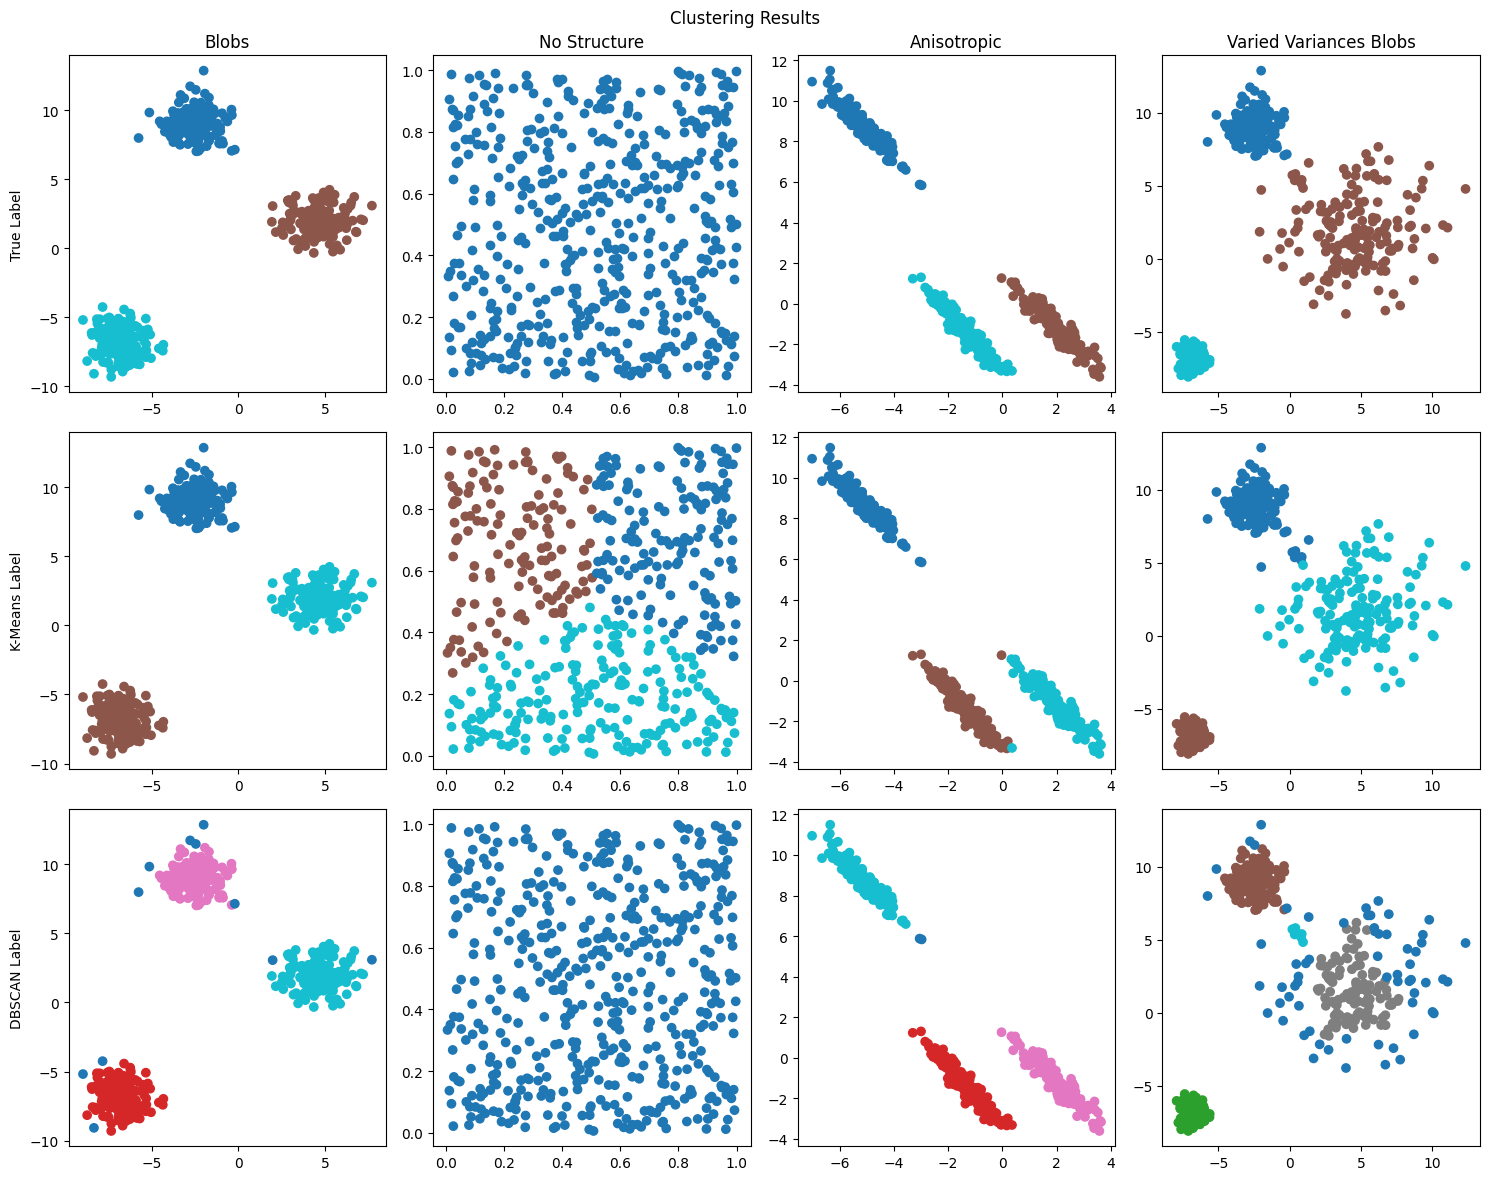

In [147]:
# There are some future warnings that we want to ignore for this exercise
import warnings
warnings.filterwarnings("ignore")

# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=random_state)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8)

# Fit the models and get the predicted labels
kmeans_labels = []
dbscan_labels = []

for _, data in datasets:
    X, y = data
    kmeans_labels.append(kmeans.fit_predict(X))
    dbscan_labels.append(dbscan.fit_predict(X))


# Visualize the datasets

# Set figure size and title
fig, axs = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('Clustering Results')

# Plot true labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[0,i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
    axs[0,i].set_title(title)
    
# Plot k-means labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[1,i].scatter(X[:, 0], X[:, 1], c=kmeans_labels[i], cmap=plt.cm.tab10)
    
# Plot DBSCAN labels
for i, (title, data) in enumerate(datasets):
    X, y = data
    axs[2,i].scatter(X[:, 0], X[:, 1], c=dbscan_labels[i], cmap=plt.cm.tab10)

# Add row titles
axs[0,0].set_ylabel('True Label')
axs[1,0].set_ylabel('K-Means Label')
axs[2,0].set_ylabel('DBSCAN Label')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In the "Blobs" dataset, since the clusters are well-defined and well-separated, both k-means and DBSCAN performed well. However, DBSCAN may identify some of the points as outliers, as it defines clusters based on density.

In the "no_structure" dataset, k-means divided the data into three clusters while DBSCAN could not identify any meaningful clusters and marked most of the data points as outliers. This is because DBSCAN is sensitive to the choice of parameters such as epsilon and minimum number of points, and in this case, the data points are randomly generated with no inherent structure or pattern, making it difficult for DBSCAN to identify any meaningful clusters.

In the "Anisotropic" dataset, k-means and DBSCAN both correctly identified the three clusters, but DBSCAN identified some noise points as outliers due to its density-based clustering approach.

In the "varied" dataset, both k-means and DBSCAN performed well in identifying the three clusters, but DBSCAN identified some noise points as a separate cluster or outliers.

## Pros and Cons

**Pros:**
- Easy to understand and implement.
- Efficient in terms of time complexity.
- Works well with large datasets.
- Guaranteed to converge.

**Cons:**
- Requires the number of clusters as an input parameter.
- Sensitive to the initial placement of centroids.
- Assumes that clusters are spherical and have similar densities.
- Can get stuck in local optima.
- Does not work well with categorical data.

## Suitable Tasks and Datasets

K-means clustering is a versatile algorithm that is suitable for a variety of tasks and datasets:

1. **Large datasets:** K-means is computationally efficient, especially with a large number of variables, making it suitable for big data tasks.

2. **Numerical data:** K-means works well with numerical data. Since it uses Euclidean distance to measure similarity, it's more suitable for continuous numerical data.

3. **Market segmentation:** K-means is often used in marketing for customer segmentation, where customers with similar behaviors are grouped together.

4. **Anomaly detection:** K-means can be used for anomaly detection where data points that are far away from any cluster center can be considered anomalies or outliers.

5. **Image compression:** K-means can be used for image compression by reducing the number of colors in an image to k.

6. **Initial cluster center for other algorithms:** K-means is often used to provide initial cluster centers for other clustering algorithms.

However, it's worth noting that K-means makes a few assumptions that may limit its usefulness with certain types of data or tasks. As mentioned above, it assumes spherical clusters of equal size, which may not always hold true. And as mentioned earlier, it works best with numerical data and may not be suitable for categorical data.


## References

1. Lloyd, S. (1982). Least squares quantization in PCM. IEEE transactions on information theory, 28(2), 129-137.
2. Forgy, E. W. (1965). Cluster analysis of multivariate data: Efficiency vs. interpretability of classifications. biometrics, 21, 768-769.
3. Scikit-Learn: K-means clustering. https://scikit-learn.org/stable/modules/clustering.html#k-means
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".